In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset

In [3]:
Tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


# Step #2: Create testing and training dataset

In [7]:
X = Tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [11]:
X.ndim, X.shape

(2, (18, 2))

In [12]:
dir(X)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [17]:
Tshirt.head(3)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S


In [18]:
Tshirt.tail(3)

,Height (in cms),Weight (in kgs),T Shirt Size
15,170,63,L
16,170,64,L
17,170,68,L


# STEP#2: Create testing and training dataset

In [19]:
Tshirt.keys()

Index(['Height (in cms)', 'Weight (in kgs)', 'T Shirt Size'], dtype='object')

In [22]:
X = Tshirt.iloc[:, :2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [23]:
X.shape

(18, 2)

In [27]:
y = Tshirt.iloc[:, -1].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [28]:
y.shape

(18,)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13, 2), (13,), (5, 2), (5,))

In [46]:
X_train_challenge, X_test_challenge, y_train_challenge, y_test_challenge = train_test_split(X, y, test_size = .5, random_state=0)

In [47]:
X_train_challenge.shape, X_test_challenge.shape, y_train_challenge.shape, y_test_challenge.shape

((9, 2), (9, 2), (9,), (9,))

# Step 3: Model Training

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [50]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Model Testing

In [51]:
y_pred =classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

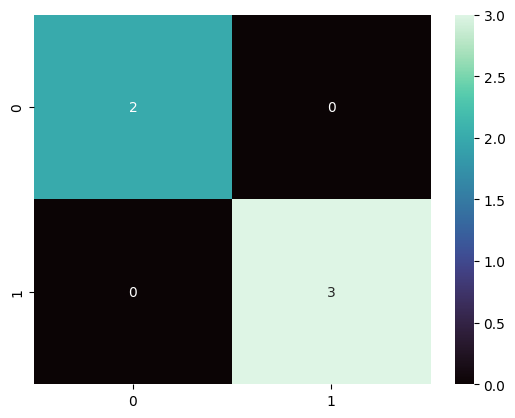

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='mako')

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [56]:
classifier2 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred3 = classifier2.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

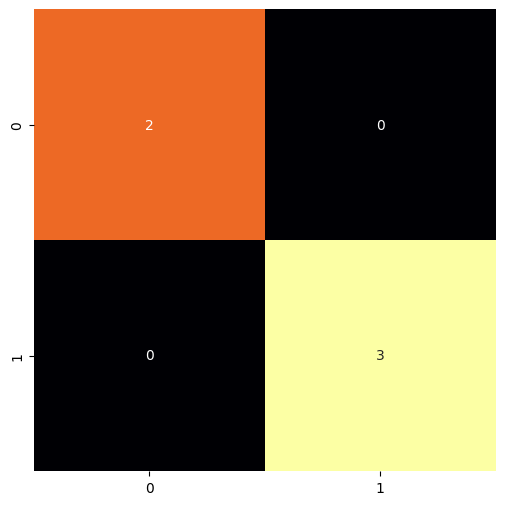

In [61]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='inferno', fmt='d', square=True, cbar=False)

# Step #5: Testing results visualization

In [62]:
from matplotlib.colors import ListedColormap

In [68]:
X_test[:5]

array([[163,  60],
       [158,  59],
       [165,  62],
       [158,  63],
       [165,  65]])

In [69]:
y_test[:5]

array([1, 1, 0, 1, 0])

In [74]:
X_test[:,0]

array([163, 158, 165, 158, 165])

In [73]:
X_test[y_test == 1,0]

array([163, 158, 158])

In [75]:
ListedColormap(('red', 'green'))(0)

(np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))

In [76]:
ListedColormap(('red', 'green'))(1)

(np.float64(0.0),
 np.float64(0.5019607843137255),
 np.float64(0.0),
 np.float64(1.0))

In [77]:
?ListedColormap

Init signature: ListedColormap(colors, name='from_list', N=None)
Docstring:     
Colormap object generated from a list of colors.

This may be most useful when indexing directly into a colormap,
but it can also be used to generate special colormaps for ordinary
mapping.

Parameters
----------
colors : list, array
    Sequence of Matplotlib color specifications (color names or RGB(A)
    values).
name : str, optional
    String to identify the colormap.
N : int, optional
    Number of entries in the map. The default is *None*, in which case
    there is one colormap entry for each element in the list of colors.
    If ::

        N < len(colors)

    the list will be truncated at *N*. If ::

        N > len(colors)

    the list will be extended by repetition.
Init docstring:
Parameters
----------
name : str
    The name of the colormap.
N : int
    The number of RGB quantization levels.
File:           ~/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.1

/tmp/ipykernel_394176/3925385991.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'red'))(i), label=j)


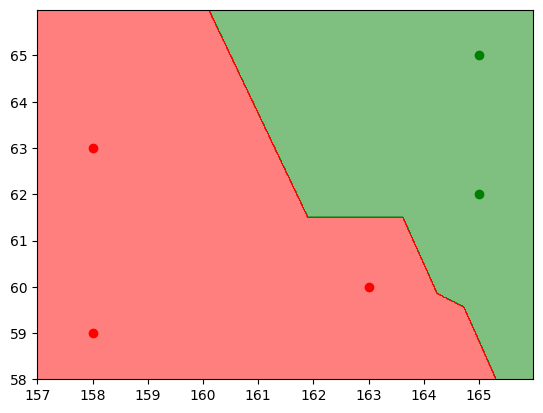

In [80]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
                    np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step = 0.01)
)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'red'))(i), label=j)

